# key words
- model selection: KFold, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit, ShuffleSplit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit, ShuffleSplit


X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 1, 1, 1, 2, 2, 2, 2])

kf = KFold(n_splits=4)
cc = 1
print("KFold(4)")
for train_index, test_index in kf.split(X, y):
    print("Round %d: ,Training indices: %s, Testing indices: %s" % (cc, train_index, test_index))
    cc += 1

skf = StratifiedKFold(n_splits=4)
cc = 1
print("StratifiedKFold(4)")
for train_index, test_index in skf.split(X, y):
    print("Round %d: ,Training indices: %s, Testing indices: %s" % (cc, train_index, test_index))
    cc += 1

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25)
cc = 1
print("StratifiedShuffleSplit(5, 0.25)")
for train_index, test_index in sss.split(X, y):
    print("Round %d: ,Training indices: %s, Testing indices: %s" % (cc, train_index, test_index))
    cc += 1

tscv = TimeSeriesSplit(n_splits=7)
cc = 1
print("TimeSeriesSplit(7)")
for train_index, test_index in tscv.split(X, y):
    print("Round %d: ,Training indices: %s, Testing indices: %s" % (cc, train_index, test_index))
    cc += 1

KFold(4)
Round 1: ,Training indices: [2 3 4 5 6 7], Testing indices: [0 1]
Round 2: ,Training indices: [0 1 4 5 6 7], Testing indices: [2 3]
Round 3: ,Training indices: [0 1 2 3 6 7], Testing indices: [4 5]
Round 4: ,Training indices: [0 1 2 3 4 5], Testing indices: [6 7]
StratifiedKFold(4)
Round 1: ,Training indices: [1 2 3 5 6 7], Testing indices: [0 4]
Round 2: ,Training indices: [0 2 3 4 6 7], Testing indices: [1 5]
Round 3: ,Training indices: [0 1 3 4 5 7], Testing indices: [2 6]
Round 4: ,Training indices: [0 1 2 4 5 6], Testing indices: [3 7]
StratifiedShuffleSplit(5, 0.25)
Round 1: ,Training indices: [3 4 7 0 5 1], Testing indices: [6 2]
Round 2: ,Training indices: [4 1 7 2 0 6], Testing indices: [3 5]
Round 3: ,Training indices: [6 0 5 1 3 4], Testing indices: [7 2]
Round 4: ,Training indices: [4 6 7 3 2 1], Testing indices: [0 5]
Round 5: ,Training indices: [6 7 2 4 1 3], Testing indices: [0 5]
TimeSeriesSplit(7)
Round 1: ,Training indices: [0], Testing indices: [1]
Round 2: 

Text(0.5, 1.0, 'Histogram of dataset')

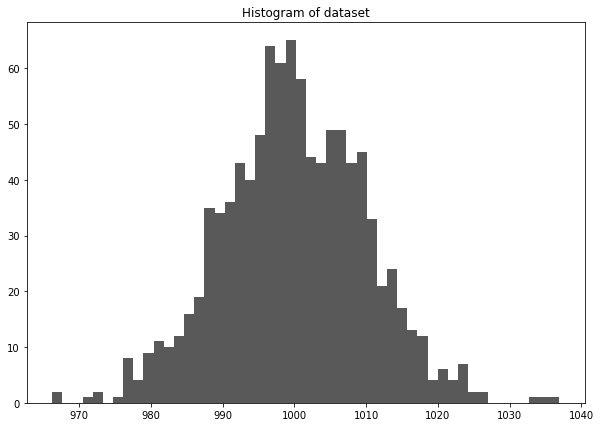

In [2]:
true_mean = 1000
true_std = 10
N = 1000
dataset = np.random.normal(loc=true_mean, scale=true_std, size=N)

f, ax = plt.subplots(figsize=(10, 7))
ax.hist(dataset, color='k', alpha=.65, histtype='stepfilled', bins=50)
ax.set_title("Histogram of dataset")

In [3]:
holdout_set = dataset[:500]
fitting_set = dataset[500:]
estimate = fitting_set[:int(N/2)].mean()
estimate

1000.310784524719

In [4]:
data_mean = dataset.mean()
data_mean

999.9704682827629

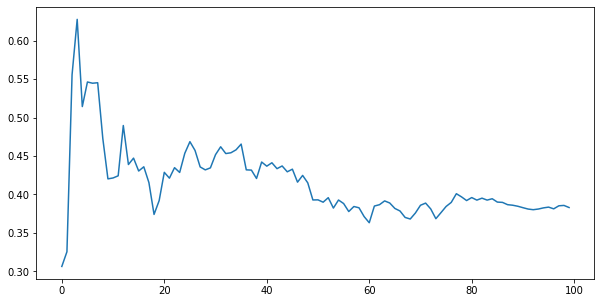

In [5]:
shuffle_split = ShuffleSplit(n_splits=100, test_size=.5, random_state=0)
mean_p = []
estimate_closeness = []
for train_index, not_used_index in shuffle_split.split(fitting_set):
    mean_p.append(fitting_set[train_index].mean())
    shuf_estimate = np.mean(mean_p)
    estimate_closeness.append(np.abs(shuf_estimate - dataset.mean()))

plt.figure(figsize=(10, 5))
plt.plot(estimate_closeness)